## 환경 설정

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 데이터 불러오기 

In [4]:
 df = pd.read_csv('./NYC_taxi')

In [5]:
df.shape

(87020, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip_code     87020 non-null  int64 
 1   pickup_hour  87020 non-null  object
 2   month        87020 non-null  int64 
 3   day          87020 non-null  int64 
 4   weekday      87020 non-null  int64 
 5   hour         87020 non-null  int64 
 6   is_weekend   87020 non-null  int64 
 7   cnt          87020 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.3+ MB


In [7]:
df['zip_code'] = df['zip_code'].astype(str)
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

> zip code는 연속형 변수가 아니므로 str타입으로 변환해주었으며,  
> pickup_hour는 datetime으로 타입을 변환해주었습니다.

# EDA 개요
### 1) 데이터 파악 및 이상유무 확인 
- 기본적인 통계량과 분포 확인
- 어떤 데이터인가?  
- 결측치, 이상치는 없는가? 

In [8]:
df.head()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt
0,11106,2015-01-01,1,1,3,0,0,75
1,10006,2015-01-01,1,1,3,0,0,64
2,11201,2015-01-01,1,1,3,0,0,169
3,11430,2015-01-01,1,1,3,0,0,222
4,10032,2015-01-01,1,1,3,0,0,64


In [9]:
df.tail()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt
87015,11219,2015-01-31 23:00:00,1,31,5,23,1,1
87016,10456,2015-01-31 23:00:00,1,31,5,23,1,3
87017,11355,2015-01-31 23:00:00,1,31,5,23,1,1
87018,11210,2015-01-31 23:00:00,1,31,5,23,1,1
87019,10167,2015-01-31 23:00:00,1,31,5,23,1,1


In [10]:
df.dtypes

zip_code               object
pickup_hour    datetime64[ns]
month                   int64
day                     int64
weekday                 int64
hour                    int64
is_weekend              int64
cnt                     int64
dtype: object

In [11]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
zip_code,0.0
pickup_hour,0.0
month,0.0
day,0.0
weekday,0.0
hour,0.0
is_weekend,0.0
cnt,0.0


> 데이터에 결측치는 존재하지 않습니다.

In [12]:
df.describe()

,month,day,weekday,hour,is_weekend,cnt
count,87020.0,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000
mean,1.0,15.871685,3.169593,11.580648,0.303838,141.603080
std,0.0,8.951484,1.936788,6.973099,0.459916,306.902683
min,1.0,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,8.000000,2.000000,6.000000,0.000000,2.000000
50%,1.0,16.000000,3.000000,12.000000,0.000000,12.000000
75%,1.0,24.000000,5.000000,18.000000,1.000000,80.000000
max,1.0,31.000000,6.000000,23.000000,1.000000,2657.000000


In [13]:
df1 = df.loc[df['weekday']>=5]
df1['is_weekend'].describe()

count    26440.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_weekend, dtype: float64

> 'weekday'는 요일을 말하는 변수로 0:월요일 ~ 6:일요일을 뜻합니다.  
> 이를 통해, 요일별 트렌드를 파악할 수 있습니다. 

# 공통질문 

### 1월 한 달간 수요추이
- 급격한 변화가 있었던 특정 날짜의 시간을 찾아보세요. 
- 왜 그랬을까요? 그 이유도 함께 추론해주세요. 


In [15]:
df_jan = df.loc[df['month']==1]
df_jan.groupby('day')['cnt'].sum()

day
1     368628
2     332101
3     393493
4     319430
5     351010
6     370413
7     415036
8     434747
9     431853
10    497635
11    405036
12    383477
13    433565
14    427660
15    436115
16    462137
17    460625
18    414109
19    332160
20    392296
21    416412
22    437448
23    456631
24    447443
25    394938
26    222332
27    130322
28    367404
29    417795
30    467775
31    502274
Name: cnt, dtype: int64

In [16]:
df_jan.groupby('day')['cnt'].sum().nsmallest(5)

day
27    130322
26    222332
4     319430
2     332101
19    332160
Name: cnt, dtype: int64

> 1월 26일과 27일에 수요가 급격하게 줄어들었음을 확인할 수 있습니다.

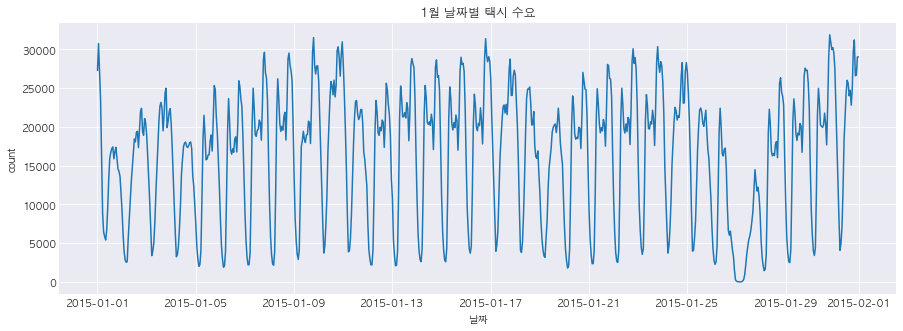

In [17]:
plt.figure(figsize=(15,5))
df_pickup_hour = df.groupby('pickup_hour').cnt.sum().to_frame()
sns.lineplot(x='pickup_hour', y='cnt', data=df_pickup_hour)
plt.xlabel('날짜')
plt.ylabel('count')
plt.title('1월 날짜별 택시 수요')
plt.show()

> 2015-01-25부터 2015-01-29사이에 수요가 급격하게 줄어든 날을 확인할 수 있습니다.  
> 또한, 날짜별 택시 수요를 파헤쳐보면 특정 날짜를 제외하고는 각 주마다의 요일별 이용기록 분포가 반복되고 있음을 파악할 수 있습니다. 

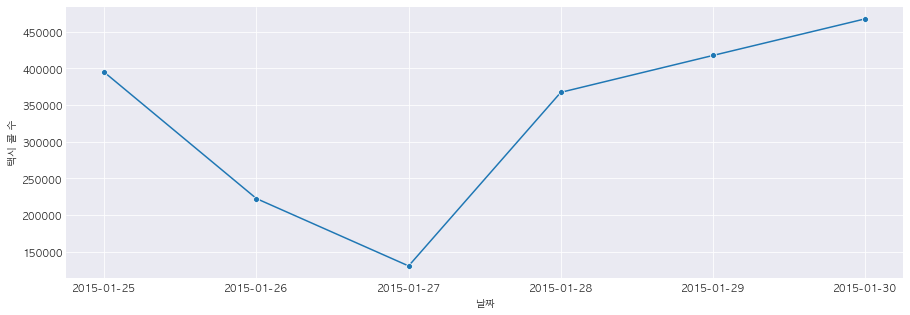

In [18]:
plt.figure(figsize=(15,5))

df['date'] = df['pickup_hour'].dt.date
df_date = df.groupby('date').cnt.sum().to_frame()
sns.lineplot(x='date', y='cnt', data=df_date.iloc[24:30], marker='o')
plt.xlabel('날짜')
plt.ylabel('택시 콜 수')
plt.show()

> 특정 날짜가 2015-01-27인 것을 그래프를 통해서도 확인할 수 있습니다.

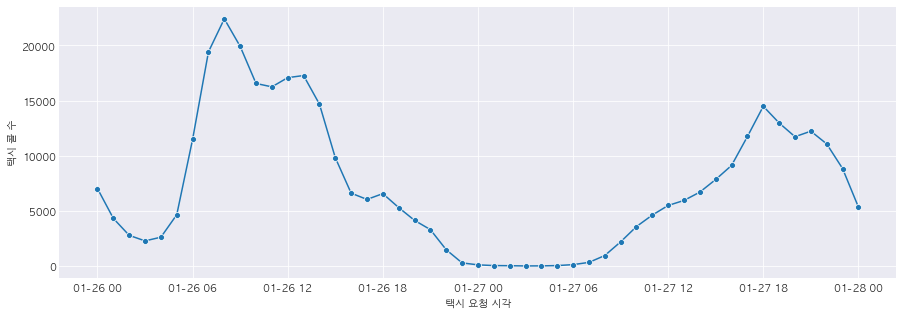

In [19]:
plt.figure(figsize=(15,5))
df_hour = df.groupby('pickup_hour').cnt.sum().to_frame()
df_hour = df_hour.loc['2015-01-26 00:00:00' : '2015-01-28 00:00:00']
sns.lineplot(x='pickup_hour', y='cnt', data=df_hour, marker = 'o')
plt.xlabel('택시 요청 시각')
plt.ylabel('택시 콜 수')
plt.show()

> 2015-01-27 00시부터 06시까지는 수요가 거의 0에 근접하였습니다.    

> 2015년 1월 27일 call 수가 저조했던 이유 : 대규모 폭설 blizzard  
https://en.wikipedia.org/wiki/January_2015_North_American_blizzard

>" De Blasio ordered all vehicles off the streets by 11 pm on January 26, and declared that, with the exception of emergency and government vehicles, anyone driving in New York City after 11 pm on January 26 would be fined. "

        -> new york 시내에 통금령이 내려질 만큼 심각했었습니다.

### 2) 인사이트 도출 
- 다양한 각도에서 데이터를 분석&시각화 
- 분석결과를 해석해보기, 왜 그럴까?
- 해석결과 활용방안 생각해보기, 어떻게 활용할 수 있을까?

 - ex) 1월 수요변화추이, 시간대별/요일별 트렌드, 가장 수요가 많은 지역은? 
 - ex) 추세선 그리기, 그룹별 막대그래프 찍어보기, 2가지 축으로 히트맵 그려보기 

#### 요일별 택시 수요 트렌드

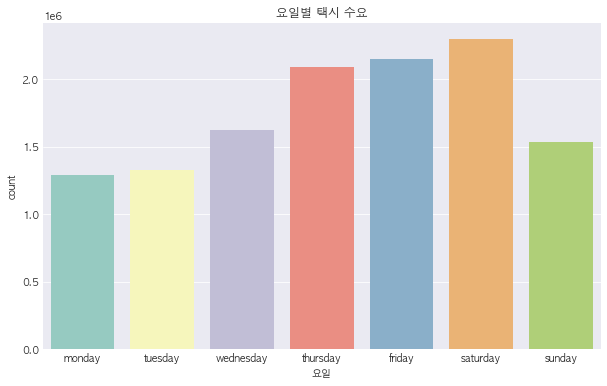

In [20]:
plt.figure(figsize=(10,6))
df_weekday = df.groupby('weekday').cnt.sum()
df_weekday

cnt = sns.barplot(x=df_weekday.index, y=df_weekday.values, palette='Set3') 
plt.xlabel("요일")
plt.ylabel("count")
plt.title("요일별 택시 수요")
plt.xticks([0,1,2,3,4,5,6], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.show()

> 이때 일요일부터 수요일까지는 목,금,토에 비해 상대적으로 수요가 적습니다. 이는, 사람들이 목,금,토에 저녁약속이 많기 때문으로 예상됩니다.  

#### 시간대별 택시 수요 트렌드

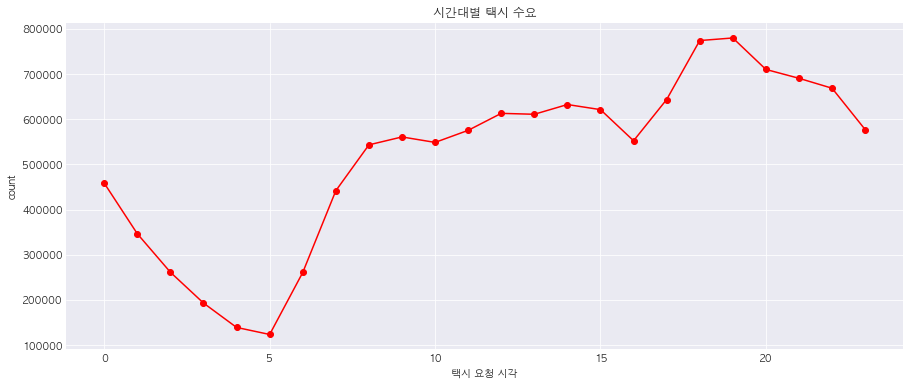

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df.groupby('hour').cnt.sum(), marker = 'o', c = 'r')
plt.xlabel('택시 요청 시각')
plt.ylabel('count')
plt.title('시간대별 택시 수요')
plt.show()

> '5시부터 9시','16시부터 19시' 사이의 시간대에 택시 수요가 증가하는 것을 통해 출퇴근으로 인해 택시 수요가 증가한 것이라고 추측할 수 있습니다.  
> 또한, '16시부터 19시'의 시간대에는 저녁 약속을 위한 이동으로 인해서도 택시 수요가 증가한 것이라고 추측할 수 있습니다.

#### 시간대와 요일별 택시 수요 트렌드

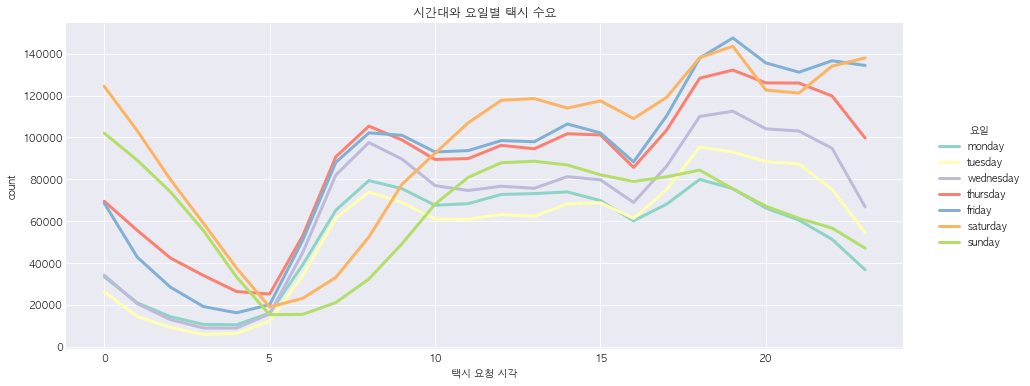

In [22]:
plt.figure(figsize=(15,6))
df_hour_weekday = df.groupby(['hour', 'weekday']).cnt.sum().unstack(1)
sns.lineplot(data = df_hour_weekday, palette='Set3', linewidth=3, dashes=False)
plt.legend(labels = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 
           loc='right', bbox_to_anchor=(1.15, 0.5), title='요일')
plt.xlabel('택시 요청 시각')
plt.ylabel('count')
plt.title('시간대와 요일별 택시 수요')
plt.show()

> 오전 10시부터 자정까지는 목요일, 금요일, 토요일의 수요가 다른 요일들에 비해 상대적으로 많습니다.  
> 이는, 사람들이 해당 요일에 더 많은 약속을 잡기 때문일 것이라고 추측할 수 있습니다.

> 오전 5시부터 오전 9시까지는 평일이 주말보다 택시 수요가 많습니다. 이는, 출근을 하는 주중에 택시를 이용하기 때문일 것이라고 추측됩니다.

> 금요일과 토요일은 20시 이후 수요가 줄어들지 않는 경향을 보이며, 토요일과 일요일은 0시부터 5시까지의 수요가 평일보다 많은 것을 알 수 있습니다.  
> 불금과 불토는 만국 공통인 것 같습니다.  

#### 주중과 주말의 택시 수요 트렌드

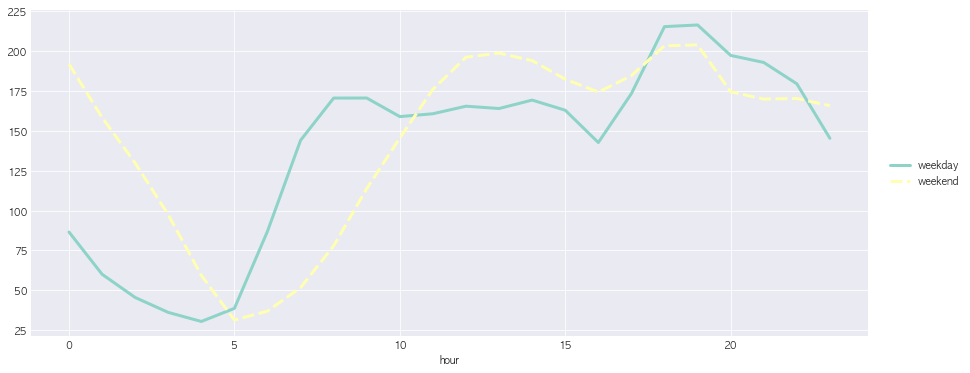

In [23]:
plt.figure(figsize=(15,6))
df_weekend = df.groupby(['hour', 'is_weekend']).cnt.mean().unstack(1)
sns.lineplot(data = df_weekend, palette='Set3', linewidth=3)
plt.legend(labels = ['weekday', 'weekend'], 
           loc='right', bbox_to_anchor=(1.12, 0.5))
plt.show()

> 주중과 주말의 차이가 새벽시간대, 아침시간대에 확연하게 드러나는 것을 확인할 수 있습니다.

#### 지역별 택시 수요 트렌드

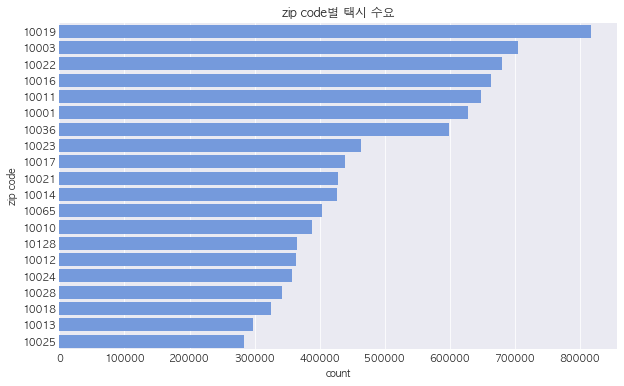

In [24]:
plt.figure(figsize=(10,6))
df_zip_sort = df.groupby('zip_code').cnt.sum().nlargest(20)
sns.barplot(x=df_zip_sort.values, y=df_zip_sort.index, color='cornflowerblue') 
plt.ylabel("zip code")
plt.xlabel("count")
plt.title("zip code별 택시 수요")
plt.show()

> zip_code 10019에서 가장 수요가 많은 것을 확인할 수 있습니다.

#### 지역과 시간별 택시 수요 히트맵

In [25]:
df_zip = df[df['zip_code'].isin(df_zip_sort.index)]

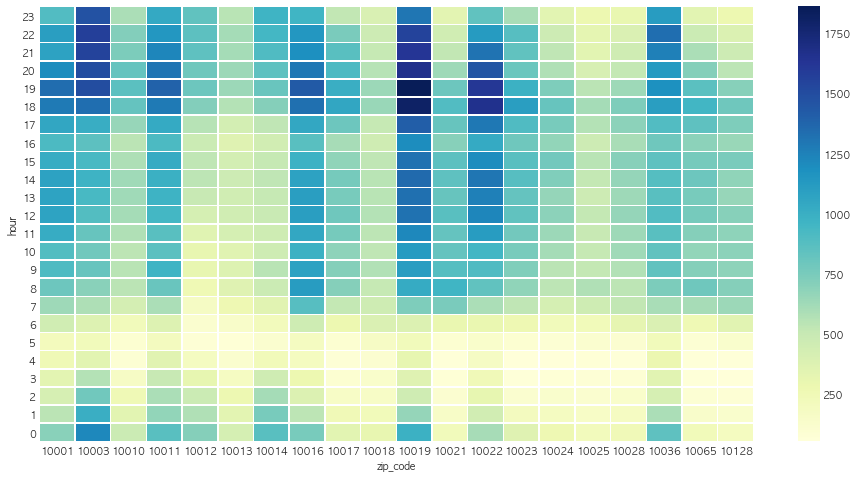

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['hour', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks(rotation=0)
plt.show()

> 대체로 2시부터 6시까지는 수요가 없다가, 출근시간대에 수요가 늘어나면서 평균적으로 18시, 19시에 수요가 가장 많은 것을 확인할 수 있습니다. 

> 10003, 10011, 10012, 10014, 10019 지역들에서는 밤~새벽 시간대까지 택시 수요가 많은 것으로 보아  
> 번화가가 위치하였거나 유동인구가 많은 곳이라고 추정할 수 있습니다.

#### 지역과 날짜별 택시 수요 히트맵

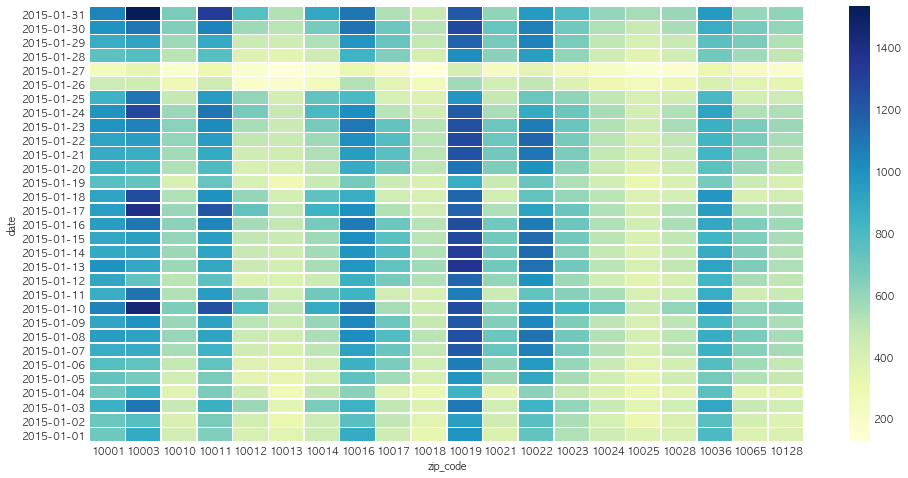

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['date', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks(rotation=0)
plt.show()

> 폭설이 왔었던 27일은 **모든 지역**에서 1월 중 가장 수요가 적은 날이였습니다.

> 10003, 10011, 100012, 10014 지역들에서는 일주일 간격으로 수요가 많은 날이 존재하는 것을 볼 수 있습니다.   
> 아래 자료를 보면, 그 날의 요일은 토요일이라는 것을 확인할 수 있으며,  
> 위 지역들이 위에서 살펴본 새벽 시간대 수요가 많은 지역들과 대다수 일치하므로 <u>번화가가 위치한 지역</u>이라고 확신할 수 있습니다.

> 10001, 10016, 10019, 10022, 10023, 10036 지역들에서는 수요가 평이한 경향을 보이고 있으며, 일요일에 수요가 적은 것을 확인할 수 있습니다.  
> 이를 통해, 위 지역들은 <u>회사가 많이 위치하여 주중에 수요가 비교적 일관되게 유지되는 것</u>이라고 추측할 수 있습니다. 

In [28]:
df_zip.groupby('date').weekday.mean()

date
2015-01-01    3
2015-01-02    4
2015-01-03    5
2015-01-04    6
2015-01-05    0
2015-01-06    1
2015-01-07    2
2015-01-08    3
2015-01-09    4
2015-01-10    5
2015-01-11    6
2015-01-12    0
2015-01-13    1
2015-01-14    2
2015-01-15    3
2015-01-16    4
2015-01-17    5
2015-01-18    6
2015-01-19    0
2015-01-20    1
2015-01-21    2
2015-01-22    3
2015-01-23    4
2015-01-24    5
2015-01-25    6
2015-01-26    0
2015-01-27    1
2015-01-28    2
2015-01-29    3
2015-01-30    4
2015-01-31    5
Name: weekday, dtype: int64

#### 지역과 요일별 택시 수요 히트맵

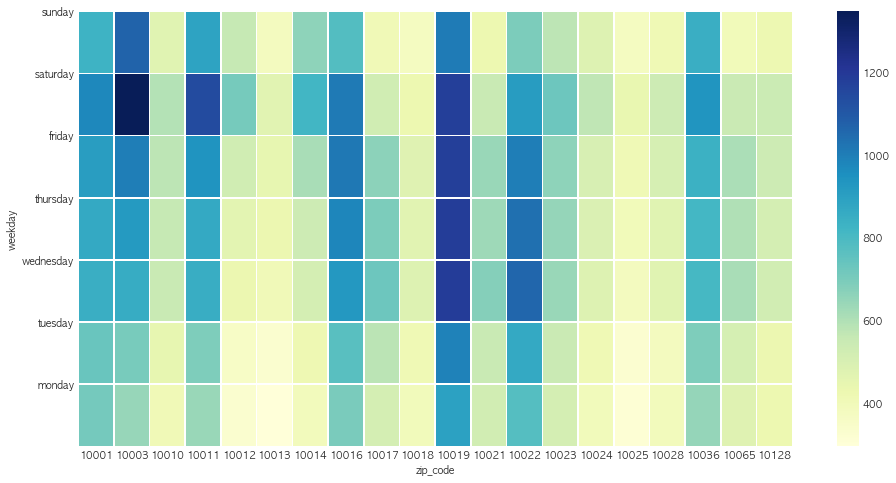

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['weekday', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks([6,5,4,3,2,1,0], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], rotation=0)
plt.show()

> 모든 지역에서 토요일에 가장 수요가 많음을 확인할 수 있습니다.  
> 10019 지역은 택시 수요가 다른 지역에 비해 월등히 많은데 **지역의 인구가 많은 것이 원인**일지 궁금증이 생겨 알아보도록 하겠습니다.

#### zip code별 위도, 경도, 인구 수 불러오기

In [30]:
zipcode = pd.read_csv('./zip_code_database.csv')

In [31]:
zipcode.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787,939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787,939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787,NaN,US,18.43,-67.15,0


> 필요한 행과 열들만 추출해줍니다.

In [32]:
zipcode = zipcode.iloc[3757:5877, [0, 12, 13, 14]]
zipcode

,zip,latitude,longitude,irs_estimated_population
3757,10001,40.75,-74.00,21760
3758,10002,40.71,-73.99,67080
3759,10003,40.73,-73.99,38080
3760,10004,40.69,-74.02,4280
3761,10005,40.71,-74.01,8280
...,...,...,...,...
5872,14785,42.15,-79.41,174
5873,14786,42.13,-78.25,222
5874,14787,42.32,-79.57,4010
5875,14788,42.06,-78.38,248


In [33]:
zipcode['zip'] = zipcode['zip'].astype(str)

#### 기존 data frame과 merge

In [34]:
df_merge = pd.merge(df, zipcode, left_on='zip_code', right_on='zip')
df_merge

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,date,zip,latitude,longitude,irs_estimated_population
0,11106,2015-01-01 00:00:00,1,1,3,0,0,75,2015-01-01,11106,40.76,-73.93,34880
1,11106,2015-01-01 01:00:00,1,1,3,1,0,152,2015-01-01,11106,40.76,-73.93,34880
2,11106,2015-01-01 02:00:00,1,1,3,2,0,192,2015-01-01,11106,40.76,-73.93,34880
3,11106,2015-01-01 03:00:00,1,1,3,3,0,179,2015-01-01,11106,40.76,-73.93,34880
4,11106,2015-01-01 04:00:00,1,1,3,4,0,130,2015-01-01,11106,40.76,-73.93,34880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,10941,2015-01-30 09:00:00,1,30,4,9,0,1,2015-01-30,10941,41.49,-74.34,13420
87016,11780,2015-01-30 09:00:00,1,30,4,9,0,1,2015-01-30,11780,40.87,-73.15,14780
87017,11507,2015-01-30 14:00:00,1,30,4,14,0,1,2015-01-30,11507,40.77,-73.64,7620
87018,14801,2015-01-30 21:00:00,1,30,4,21,0,1,2015-01-30,14801,42.10,-77.23,4600


In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   zip_code                  87020 non-null  object        
 1   pickup_hour               87020 non-null  datetime64[ns]
 2   month                     87020 non-null  int64         
 3   day                       87020 non-null  int64         
 4   weekday                   87020 non-null  int64         
 5   hour                      87020 non-null  int64         
 6   is_weekend                87020 non-null  int64         
 7   cnt                       87020 non-null  int64         
 8   date                      87020 non-null  object        
 9   zip                       87020 non-null  object        
 10  latitude                  87020 non-null  float64       
 11  longitude                 87020 non-null  float64       
 12  irs_estimated_popu

> 결측치 없이 merge가 잘 수행되었습니다.

#### 인구수 top 30 지역의 heatmap

In [36]:
import folium

base_map = folium.Map(location=[df_merge['latitude'].mean(),df_merge['longitude'].mean()],
                      control_scale=True,
                      scrollWheelZoom=False,
                      zoom_start=11)

top_pop = df_merge.groupby(['latitude', 'longitude']).irs_estimated_population.mean().nlargest(30).to_frame().reset_index()

for i in range(0,len(top_pop)): 
    folium.Marker([top_pop.iloc[i]['latitude'], top_pop.iloc[i]['longitude']], 
                  popup='population: ' + str(top_pop.iloc[i]['irs_estimated_population']), 
                  icon=folium.Icon(icon="home", prefix="fa", color="green")
                 ).add_to(base_map)

base_map

#### cnt top 30 지역에 marker 추가

In [37]:
top_cnt = df_merge.groupby(['latitude', 'longitude']).cnt.sum().nlargest(30).to_frame().reset_index()

for i in range(0,len(top_cnt)): 
    folium.Marker([top_cnt.iloc[i]['latitude'], top_cnt.iloc[i]['longitude']],
                  popup='count: ' + str(top_cnt.iloc[i]['cnt']),
                  icon=folium.Icon(icon="car", prefix="fa", color="blue")
                 ).add_to(base_map)

top_cnt_pop = pd.merge(top_pop, top_cnt, on=['latitude', 'longitude'])

for i in range(0, len(top_cnt_pop)):
    folium.Marker([top_cnt_pop.iloc[i]['latitude'], top_cnt_pop.iloc[i]['longitude']],
                  popup='count: ' + str(top_cnt_pop.iloc[i]['cnt']) + "<br/>" + 'population: ' + str(top_pop.iloc[i]['irs_estimated_population']),
                  icon=folium.Icon(icon="user", prefix="fa", color="red")
                 ).add_to(base_map)
    
base_map


> 인구 수가 많아도 택시 수요는 많지 않은 것으로 보아 주거지에서 택시 수요는 적으며, 근무지 또는 번화가에서 택시 수요가 많은 것으로 추측할 수 있습니다.

# 목적과 활용방안까지 구체적으로 제안해보는 EDA

### 전체 EDA 중 최소 1가지 이상 부탁드립니다! 


1) 어떤 기업의 구체적인 상황이나 니즈에 과몰입 해봅시다! 
- 주체가 꼭 기업이 아니어도 된다! 
- Ex) 모빌리티 플랫폼에겐 운전기사도 주요 파트너 고객, 운전기사에게 컨설팅을 해준다면? 
	혹은, 정부기관을 설득하기 위해, 데이터로 어떤 사회문제를 해결할 수 있음을 어필한다면?
 
2) 주어진 데이터에 한정되지 말고, 더 넓은 범위의 활용가능성을 생각해보세요! 
- ~에 대한 데이터가 더 있다면, ~를 해볼 수 있을 것이다. 
- 데이터 분석에 더불어, 자료조사를 통해 논리를 완성해도 됨, ex) 통계청, 산업 보고서에 따르면 


# 종원 님이 ppt를 통해 설명해주실 예정입니다~~ 👏👏👏